In [1]:
# Import the necessary modules

import keras
from keras import datasets
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import PReLU, LeakyReLU, Conv2D, MaxPool2D, Lambda
from keras.regularizers import l2

import numpy as np
from random import randint
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

from keras.models import model_from_json
from keras.models import Sequential

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import pickle
import sklearn as skl

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [215]:
# Define some useful functions
class PlotLossAccuracy(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.losses = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(int(self.i))
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(16, 6))
        plt.plot([1, 2])
        plt.subplot(121) 
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="validation loss")
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('Model Loss')
        plt.legend()
        plt.subplot(122)         
        plt.plot(self.x, self.acc, label="training accuracy")
        plt.plot(self.x, self.val_acc, label="validation accuracy")
        plt.legend()
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.title('Model Accuracy')
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show();
        
def save_model_to_disk():    
    # save model and weights (don't change the filenames)
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to model.json and weights to model.h5")
    
"""def returnColour(x):
    if x=='b':
        return 'blue'
    elif x=='g':
        return 'green'
    elif x=='y':
        return 'yellow'
    elif x=='w':
        return 'white'
    elif x=='r':
        return 'red'
    elif x=='o':
        return 'orange'"""
    
    
def returnColour(x):
    if x==1:
        return 'blue'
    elif x==2:
        return 'green'
    elif x==3:
        return 'yellow'
    elif x==4:
        return 'white'
    elif x==5:
        return 'red'
    elif x==6:
        return 'orange'
    

In [374]:
from graphics import *

class cube():
    """
    front=np.array(['b','b','b','b'])
    back=np.array(['g','g','g','g'])
    top=np.array(['y','y','y','y'])
    bottom=np.array(['w','w','w','w'])
    left=np.array(['o','o','o','o'])
    right=np.array(['r','r','r','r'])
    """
    def __init__(self):
        self.front=np.array([1,1,1,1])
        self.back=np.array([2,2,2,2])
        self.top=np.array([3,3,3,3])
        self.bottom=np.array([4,4,4,4])
        self.left=np.array([5,5,5,5])
        self.right=np.array([6,6,6,6])
    
    def draw(self, size):
        center = [0,0]
        win = GraphWin('Face', (6*size), (8*size)) # give title and dimensions
        
        center = [3*size, 1*size]
        self.draw_face(self.back, center, size, win)
        center = [3*size, 3*size]
        self.draw_face(self.top, center, size, win)
        center = [3*size, 5*size]
        self.draw_face(self.front, center, size, win)
        center = [3*size, 7*size]
        self.draw_face(self.bottom, center, size, win)
        
        center = [1*size, 3*size]
        self.draw_face(self.left, center, size, win)
        center = [5*size, 3*size]
        self.draw_face(self.right, center, size, win)
        
        label = Text(Point(100, 120), 'CUBE')
        label.draw(win)

        message = Text(Point(win.getWidth()/2, 20), 'Click anywhere to quit.')
        message.draw(win)
        win.getMouse()
        win.close()
        
    def draw_face(self, face, center, size, win):
        
        rect = Rectangle(Point(center[0], center[1]), Point(center[0]-size,center[1]+size))
        rect.setFill(returnColour(face[0]))
        rect.draw(win)
            
        rect = Rectangle(Point(center[0], center[1]), Point(center[0]+size,center[1]+size))
        rect.setFill(returnColour(face[1]))
        rect.draw(win)
        
        rect = Rectangle(Point(center[0], center[1]), Point(center[0]-size,center[1]-size))
        rect.setFill(returnColour(face[2]))
        rect.draw(win)
            
        rect = Rectangle(Point(center[0], center[1]), Point(center[0]+size,center[1]-size))
        rect.setFill(returnColour(face[3]))
        rect.draw(win)
        
    def rotate(self, face, direction):
        idx = [2,0,3,1]
        if direction == 'clkwise':
            face = face[idx]
        else:
            face = face[1,3,0,2]
        
    def U(self):
        self.rotate(self.top, 'clkwise')
        for i in range(0,2):
            self.front[i], self.right[i] = self.right[i], self.front[i]
            self.right[i], self.back[i] = self.back[i], self.right[i]
            self.back[i], self.left[i] = self.left[i], self.back[i]
            
    def R(self):
        self.rotate(self.right, 'clkwise')
        for i in range(1,3):
            self.front[i], self.bottom[i] = self.bottom[i], self.front[i]
            self.bottom[i], self.back[i] = self.back[i], self.bottom[i]
            self.back[i], self.top[i] = self.top[i], self.back[i]
    
    def F(self):
        self.rotate(self.front, 'clkwise')
        for i in range(2,3):
            self.top[i], self.left[i] = self.left[i], self.top[i]
            self.left[i], self.bottom[i] = self.bottom[i], self.left[i]
            self.left[i], self.top[i] = self.top[i], self.left[i]
    
    def move(self, num, output):
        if num == 0:
            self.U()
            face = 'U'
        elif num ==1:
            self.R()
            face = 'R'
        elif num==2:
            self.F()
            face = 'F'
        if output:
           # print(face)
    
    def scramble(self, output):
        #print('\nScrambling...\n')
        for i in range(0,20):
            self.move(randint(0,2),0)
            if output:
                self.draw(50)
        #print('\nScramble Finished\n--------\n')
        #print(self.get_state())
        print('\n')
    
    def get_state(self):
        return (np.array([self.front,self.back,
                          self.top,self.bottom,
                          self.left,self.right],
                         dtype='float32'))
        
            

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 256)               6400      
_________________________________________________________________
dense2 (Dense)               (None, 512)               131584    
_________________________________________________________________
softmax (Dense)              (None, 3)                 1539      
Total params: 139,523
Trainable params: 139,523
Non-trainable params: 0
_________________________________________________________________
Epoch 0
--------------------------
Num Moves1

100
[[5. 6. 2. 1.]
 [6. 5. 1. 2.]
 [3. 4. 3. 3.]
 [4. 3. 4. 4.]
 [2. 2. 5. 5.]
 [1. 1. 6. 6.]]


[[1. 1. 2. 1. 2. 2. 1. 2. 3. 4. 3. 3. 4. 3. 4. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
Current Lowest Error: 6.0


[[6. 5. 2. 1. 5. 6. 1. 2. 3. 4. 3. 3. 4. 3. 4. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[6. 3. 4. 1. 5. 4. 3. 2. 3. 5. 2. 3. 4. 6. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]


Epoch 1
--------------------------
Num Moves1

6.0
[[6. 4. 3. 1.]
 [5. 3. 4. 2.]
 [3. 6. 2. 3.]
 [4. 5. 1. 4.]
 [1. 1. 5. 5.]
 [2. 2. 6. 6.]]


[[2. 2. 3. 1. 1. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 3. 1. 5. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 3. 1. 5. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 3. 1. 5. 3. 

[[6. 4. 3. 1. 5. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 3. 1. 5. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 3. 1. 5. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 3. 1. 5. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[2. 2. 3. 1

[[5. 6. 3. 1. 6. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 3. 1. 5. 6. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 3. 1. 6. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 3. 1. 5. 6. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 3. 1. 6. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 3. 1. 5. 6. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 3. 1. 6. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 3. 1

[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 4. 1

[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 5. 3. 1

[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1. 1. 3. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 4. 3. 1

[[2. 3. 2. 1. 1. 4. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 2. 1. 5. 1. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[1. 4. 2. 1. 2. 3. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 2. 1. 6. 2. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 2. 1. 1. 4. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 2. 1. 5. 1. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[1. 4. 2. 1. 2. 3. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 2. 1. 6. 2. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 2. 1. 1. 4. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 2. 1. 5. 1. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[1. 4. 2. 1. 2. 3. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 2. 1. 6. 2. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 2. 1. 1. 4. 1. 2. 3. 6. 4. 3. 4. 5. 3. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 2. 1

[[1. 5. 1. 1. 2. 6. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1. 6. 3. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[2. 6. 1. 1. 1. 5. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 1. 1. 5. 4. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 1. 5. 5. 5. 2. 6. 6. 6.]]
[[1. 5. 1. 1. 2. 6. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1. 6. 3. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[2. 6. 1. 1. 1. 5. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 1. 1. 5. 4. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 1. 5. 5. 5. 2. 6. 6. 6.]]
[[1. 5. 1. 1. 2. 6. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1. 6. 3. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[2. 6. 1. 1. 1. 5. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 1. 1. 5. 4. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 1. 5. 5. 5. 2. 6. 6. 6.]]
[[1. 5. 1. 1. 2. 6. 2. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1

[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1. 2. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[1. 5. 2. 1

[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[2. 3. 3. 1

[[2. 4. 4. 1. 1. 3. 3. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 2. 1. 3. 4. 1. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 2. 1. 3. 4. 1. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 2. 1. 3. 4. 1. 2. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 2. 1. 3. 4. 1. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
Epoch 12
--------------------------
Num Moves5

6.0
[[2. 4. 1. 1.]
 [1. 3. 2. 2.]
 [3. 6. 3. 3.]
 [4. 5. 4. 4.]
 [6. 1. 5. 5.]
 [5. 2. 6. 6.]]


[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[5. 6. 4. 1. 6. 5.

[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 4. 2. 3. 4. 3. 1. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[2. 6. 4. 1

[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[1. 5. 4. 1. 2. 6. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 5. 2. 5. 5. 6. 1. 6. 6.]]
[[2. 6. 4. 1

[[2. 2. 3. 1. 1. 1. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 3. 1. 5. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 3. 1. 6. 3. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 3. 1. 5. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 3. 1. 6. 3. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 3. 1. 5. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[1. 1. 3. 1. 2. 2. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 3. 1. 6. 3. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[2. 2. 3. 1. 1. 1. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 3. 1

[[5. 6. 4. 1. 6. 5. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[2. 3. 4. 1

[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1. 2. 4. 4. 2. 3. 2. 1. 3. 4. 1. 2. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[1. 3. 3. 1

[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1. 6. 1. 3. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 2. 4. 1

[[2. 3. 3. 1. 1. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 3. 1. 2. 3. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 3. 1. 2. 3. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 3. 1. 6. 6. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 3. 1. 2. 3. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 3. 1. 5. 5. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 3. 1. 1. 4. 4. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 3. 1

[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1

[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[6. 5. 4. 1. 5. 6. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[5. 6. 4. 1. 6. 5. 3. 2. 3. 1. 1. 3. 4. 2. 2. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
Epoch 22
--------------------------
Num Moves10

6.0
[[1. 4. 1. 1.]
 [2. 3. 2. 2.]
 [3. 

Epoch 23
--------------------------
Num Moves11

6.0
[[1. 2. 4. 1.]
 [2. 1. 3. 2.]
 [3. 6. 2. 3.]
 [4. 5. 1. 4.]
 [5. 4. 5. 5.]
 [6. 3. 6. 6.]]


[[5. 4. 4. 1. 6. 3. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[2. 1. 4. 1. 1. 2. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 4. 1. 5. 4. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[1. 2. 4. 1. 2. 1. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 4. 1. 6. 3. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[2. 1. 4. 1. 1. 2. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 4. 1. 5. 4. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[1. 2. 4. 1. 2. 1. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 4. 1. 6. 3. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[2. 1. 4. 1. 1. 2. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 4. 1. 5. 4. 3. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[1. 2. 4. 1. 2. 1

[[2. 1. 1. 1. 1. 2. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[6. 6. 1. 1. 5. 5. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[1. 2. 1. 1. 2. 1. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[5. 5. 1. 1. 6. 6. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[2. 1. 1. 1. 1. 2. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[6. 6. 1. 1. 5. 5. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[1. 2. 1. 1. 2. 1. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[5. 5. 1. 1. 6. 6. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[2. 1. 1. 1. 1. 2. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[6. 6. 1. 1. 5. 5. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[1. 2. 1. 1. 2. 1. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[5. 5. 1. 1. 6. 6. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[2. 1. 1. 1. 1. 2. 2. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[6. 6. 1. 1

[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1. 6. 2. 3. 2. 3. 4. 1. 3. 4. 3. 2. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[5. 1. 4. 1

[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1. 6. 4. 4. 2. 3. 5. 2. 3. 4. 6. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[5. 3. 3. 1

[[6. 3. 3. 1. 5. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[2. 1. 3. 1. 1. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[5. 4. 3. 1. 6. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[1. 2. 3. 1. 2. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[6. 3. 3. 1. 5. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[2. 1. 3. 1. 1. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[5. 4. 3. 1. 6. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[1. 2. 3. 1. 2. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[6. 3. 3. 1. 5. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[2. 1. 3. 1. 1. 2. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[5. 4. 3. 1. 6. 3. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 2. 1. 5. 5. 1. 2. 6. 6.]]
[[1. 2. 3. 1. 2. 1. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[6. 3. 3. 1. 5. 4. 4. 2. 3. 6. 2. 3. 4. 5. 1. 4. 1. 2. 5. 5. 2. 1. 6. 6.]]
[[2. 1. 3. 1

[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1. 6. 6. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 2. 3. 5. 5. 1. 4. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 1. 4. 5. 5. 2. 3. 6. 6.]]
[[2. 3. 4. 1. 1. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[5. 5. 4. 1

[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1. 5. 3. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1. 5. 3. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1. 5. 3. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1. 5. 3. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1. 5. 3. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1. 5. 3. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 1. 1. 5. 5. 2. 2. 6. 6.]]
[[5. 3. 4. 1. 6. 4. 3. 2. 3. 6. 1. 3. 4. 5. 2. 4. 2. 2. 5. 5. 1. 1. 6. 6.]]
[[6. 4. 4. 1

[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 6. 5. 5. 5. 5. 6. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 1. 2. 3. 4. 2. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[2. 4. 4. 1

[[1. 5. 1. 1. 2. 6. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[5. 3. 1. 1. 6. 4. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[2. 6. 1. 1. 1. 5. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[6. 4. 1. 1. 5. 3. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 1. 5. 5. 5. 2. 6. 6. 6.]]
[[1. 5. 1. 1. 2. 6. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[5. 3. 1. 1. 6. 4. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[2. 6. 1. 1. 1. 5. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[6. 4. 1. 1. 5. 3. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 1. 5. 5. 5. 2. 6. 6. 6.]]
[[1. 5. 1. 1. 2. 6. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[5. 3. 1. 1. 6. 4. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 2. 6. 5. 5. 1. 5. 6. 6.]]
[[2. 6. 1. 1. 1. 5. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[6. 4. 1. 1. 5. 3. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 1. 5. 5. 5. 2. 6. 6. 6.]]
[[1. 5. 1. 1. 2. 6. 2. 2. 3. 1. 3. 3. 4. 2. 4. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[5. 3. 1. 1

[[1. 6. 1. 1. 2. 5. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1. 6. 3. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[2. 5. 1. 1. 1. 6. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 1. 1. 5. 4. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[1. 6. 1. 1. 2. 5. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1. 6. 3. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[2. 5. 1. 1. 1. 6. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 1. 1. 5. 4. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[1. 6. 1. 1. 2. 5. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1. 6. 3. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[2. 5. 1. 1. 1. 6. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 6. 3. 5. 5. 5. 4. 6. 6.]]
[[6. 3. 1. 1. 5. 4. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[1. 6. 1. 1. 2. 5. 2. 2. 3. 1. 4. 3. 4. 2. 3. 4. 5. 4. 5. 5. 6. 3. 6. 6.]]
[[5. 4. 1. 1

[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1. 2. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 6. 5. 5. 6. 5. 6. 6.]]
[[1. 4. 4. 1

[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1. 1. 5. 3. 2. 3. 3. 2. 3. 4. 4. 1. 4. 6. 1. 5. 5. 5. 2. 6. 6.]]
[[2. 6. 4. 1

[[5. 5. 4. 1. 6. 6. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 2. 4. 5. 5. 1. 3. 6. 6.]]
[[1. 3. 4. 1. 2. 4. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[6. 6. 4. 1. 5. 5. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 1. 3. 5. 5. 2. 4. 6. 6.]]
[[2. 4. 4. 1. 1. 3. 3. 2. 3. 2. 2. 3. 4. 1. 1. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
Epoch 36
--------------------------
Num Moves17

6.0
[[2. 5. 2. 1.]
 [1. 6. 1. 2.]
 [3. 2. 4. 3.]
 [4. 1. 3. 4.]
 [6. 4. 5. 5.]
 [5. 3. 6. 6.]]


[[5. 3. 2. 1. 6. 4. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 2. 1. 5. 3. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[5. 3. 2. 1. 6. 4. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[6. 4. 2. 1. 5. 3. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[2. 5. 2. 1. 1. 6

[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1. 2. 1. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1. 2. 1. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1. 2. 1. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1. 2. 1. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1. 2. 1. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1. 2. 1. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 5. 5. 5. 5. 6. 6. 6. 6.]]
[[2. 1. 2. 1. 1. 2. 1. 2. 3. 4. 4. 3. 4. 3. 3. 4. 6. 6. 5. 5. 5. 5. 6. 6.]]
[[1. 2. 2. 1

[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1. 2. 5. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 5. 3. 5. 5. 6. 4. 6. 6.]]
[[2. 5. 2. 1. 1. 6. 1. 2. 3. 2. 4. 3. 4. 1. 3. 4. 6. 4. 5. 5. 5. 3. 6. 6.]]
[[1. 6. 2. 1

[[1. 6. 3. 1. 2. 5. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 3. 1. 6. 2. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[2. 5. 3. 1. 1. 6. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 3. 1. 5. 1. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[1. 6. 3. 1. 2. 5. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 3. 1. 6. 2. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[2. 5. 3. 1. 1. 6. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 3. 1. 5. 1. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[1. 6. 3. 1. 2. 5. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 3. 1. 6. 2. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 2. 5. 5. 5. 1. 6. 6. 6.]]
[[2. 5. 3. 1. 1. 6. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 6. 2. 5. 5. 5. 1. 6. 6.]]
[[6. 2. 3. 1. 5. 1. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 1. 6. 5. 5. 2. 5. 6. 6.]]
[[1. 6. 3. 1. 2. 5. 4. 2. 3. 3. 1. 3. 4. 4. 2. 4. 5. 1. 5. 5. 6. 2. 6. 6.]]
[[5. 1. 3. 1

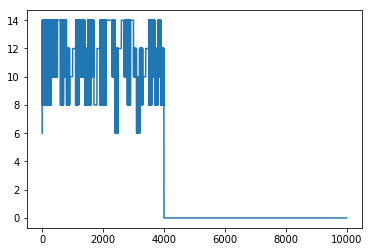

In [419]:

# Create an instance of our callback functions class, to plot our loss function and accuracy with each epoch.
#pltCallBack = PlotLossAccuracy()

solved_cube = cube()
solved_state = solved_cube.get_state()
solved_state = solved_state.reshape(24)

test_state = [1,24]

def error(test_state):
    e = abs(test_state - solved_state)
    e[e>0] = 1
    return(np.sum(e))

def update_weights(weights):
    weights[0] += np.random.normal(0,.0001,(weights[0].shape))
    weights[1] += np.random.normal(0,.0001,(weights[1].shape))
    return weights
    


# create model
model = Sequential()
model.add(Dense(256, input_dim=24, activation='relu', name='dense1'))
model.add(Dense(512, activation='relu', name='dense2'))
model.add(Dense(3, activation='softmax', name='softmax'))
#model.compile(loss=error(test_state), optimizer='rmsprop', metrics=['accuracy'])
model.summary()

num_players = 100
num_moves = 1
CurrE = 100
noise = np.random.normal(0,1,100)
k=0
errors = np.zeros(10000)

for epoch in range (0,40):
    print('Epoch %s\n--------------------------'%epoch)
    print('Num Moves%s\n'%num_moves)
    print(CurrE)
    test_cube=cube()
    test_cube.scramble(0)
    test_state = test_cube.get_state()
    test_state = test_state.reshape(1,24)
    
    for players in range(0,num_players):
        #print('Player %s\n--------'%players)
        for move in range(0,num_moves):
            predictions = model.predict(test_state, batch_size = 24)
            #print("Move %s:\n-----------\n" %(move+1))
            #print(predictions, np.argmax(predictions))
            test_cube.move(np.argmax(predictions),0)
            test_state = test_cube.get_state()
            #print(test_state)
            #print('\n')
            test_state = test_state.reshape(1,24)
        print(test_state)
        er = error(test_state)
        errors[k] =er
        k+=1
        if CurrE > er:
            CurrE = er
            print("Current Lowest Error: %s\n\n" %CurrE)
            CurrW0 = model.layers[0].get_weights()
            CurrW1 = model.layers[1].get_weights()
        
        for i in range(0, len(model.layers)):
            #print(model.layers[i].get_weights())
            model.layers[i].set_weights(update_weights(model.layers[i].get_weights()))  
            #print(model.layers[i].get_weights())
    model.layers[0].set_weights(CurrW0)
    model.layers[1].set_weights(CurrW1)
    
    num_moves = epoch/2
    if num_moves <=0:
        num_moves =1
    """
        layer1 = model.layers[0].get_weights()
        layer2 = model.layers[1].get_weights()
        
        layer1_input = layer1[0]
        layer1_output = layer1[1]
        
        layer2_input = layer2[0]
        layer2_output = layer2[1]
        
        print(len(layer1),layer1_input.shape,layer1_output.shape)
        print(len(layer2),layer2_input.shape,layer2_output.shape)
        """


plt.plot(errors)

        
        
        


In [416]:
print(errors)


[10. 12. 10. ...  0.  0.  0.]


In [ ]:
# write model to model.json and weights to model.h5 for submission

save_model_to_disk()